In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

In [4]:

def runRandomForest(n_estimators, criterion, X_train, y_train, X_valid, y_valid):
    penguin = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion)
    penguin.fit(X_train,y_train)

    y_predict = penguin.predict(X_valid)
    y_predict = np.argmax(y_predict, axis=1)
    y_test_label = np.argmax(y_valid, axis=1)

    score = sum(y_predict==y_test_label)/y_valid.shape[0]

    # labels = ["Adelie", "Chinstrap", "Gentoo"]

    # cm = confusion_matrix(y_test_label, y_predict)

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # disp.plot(cmap=plt.cm.Blues)
    # # plt.savefig('../pics/random_forest/confusion_matrix')
    # # plt.savefig('../pics/random_forest/confusion_matrix.pdf')
    # plt.show()
    return score

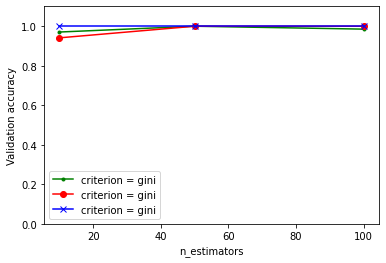

In [10]:
X_train, y_train, X_valid, y_valid = getData(50)
his_1_score = []
his_2_score = []
his_3_score = []
n_estimators = [10, 50, 100]
for i in n_estimators:
    his_1 = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_1_score.append(his_1)

X_train, y_train, X_valid, y_valid = getData(110)
for i in n_estimators:
    his_2 = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_2_score.append(his_2)

X_train, y_train, X_valid, y_valid = getData(170)
for i in n_estimators:
    his_3 = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_3_score.append(his_3)



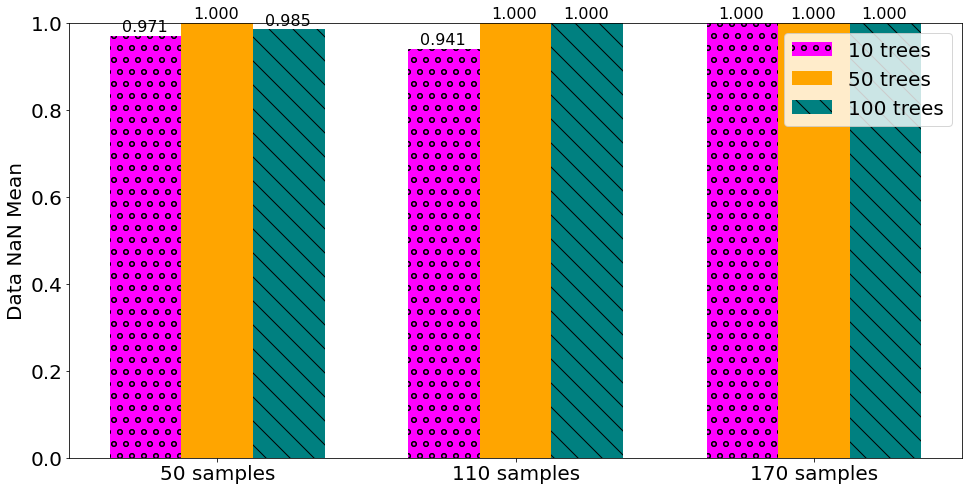

In [25]:
objects = ('50 samples', '110 samples', '170 samples')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

estimators_10 = [his_1_score[0], his_2_score[0], his_3_score[0]]
estimators_50 = [his_1_score[1], his_2_score[1], his_3_score[1]]
estimators_100 = [his_1_score[2], his_2_score[2], his_3_score[2]]

for index, value in enumerate(estimators_10):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_50):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_100):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)

bars_10_estimators = plt.bar(y_pos - 0.24, estimators_10, 0.24, label = '10 trees', color = 'magenta')
plt.bar(y_pos, estimators_50, 0.24, label = '50 trees', color = 'orange')
bars_100_estimators = plt.bar(y_pos + 0.24, estimators_100, 0.24, label = '100 trees', color = 'teal')

plt.xticks(y_pos, objects)
plt.ylim([0, 1])
patterns = ("o", "o", "o")
for i, x in zip(bars_10_estimators,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_100_estimators,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.ylabel("Data NaN Mean")
plt.savefig('../pics/ANN/activation_with_different_data.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/activation_with_different_data.pdf', bbox_inches='tight')
plt.show()


In [27]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_1N_score = []
his_2N_score = []
his_3N_score = []
n_estimators = [10, 50, 100]
for i in n_estimators:
    his_1N = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_1N_score.append(his_1N)

X_train, y_train, X_valid, y_valid = getData(110)
for i in n_estimators:
    his_2N = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_2N_score.append(his_2N)

X_train, y_train, X_valid, y_valid = getData(170)
for i in n_estimators:
    his_3N = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_3N_score.append(his_3N)



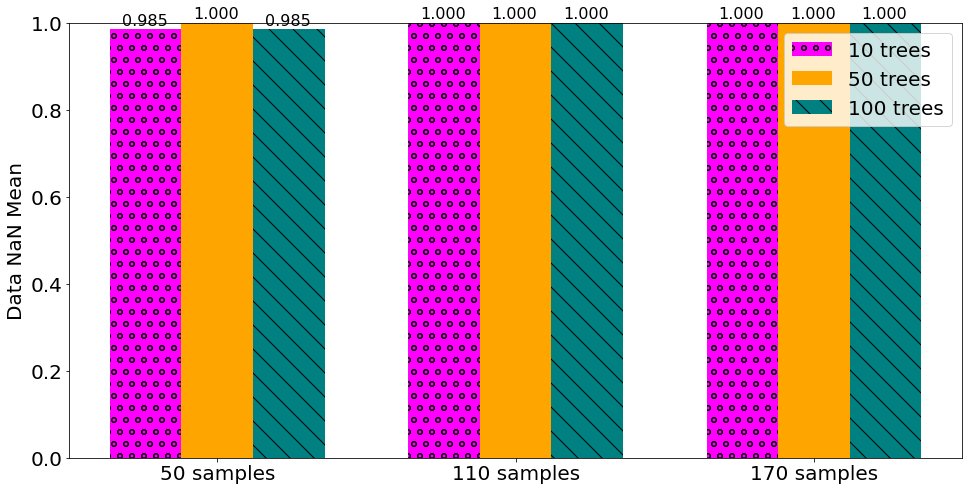

In [28]:
objects = ('50 samples', '110 samples', '170 samples')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

estimators_10N = [his_1N_score[0], his_2N_score[0], his_3N_score[0]]
estimators_50N = [his_1N_score[1], his_2N_score[1], his_3N_score[1]]
estimators_100N = [his_1N_score[2], his_2N_score[2], his_3N_score[2]]

for index, value in enumerate(estimators_10N):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_50N):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_100N):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)

bars_10N_estimators = plt.bar(y_pos - 0.24, estimators_10N, 0.24, label = '10 trees', color = 'magenta')
plt.bar(y_pos, estimators_50N, 0.24, label = '50 trees', color = 'orange')
bars_100N_estimators = plt.bar(y_pos + 0.24, estimators_100N, 0.24, label = '100 trees', color = 'teal')

plt.xticks(y_pos, objects)
plt.ylim([0, 1])
patterns = ("o", "o", "o")
for i, x in zip(bars_10N_estimators,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_100N_estimators,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.ylabel("Data NaN Mean")
plt.savefig('../pics/ANN/activation_with_different_data.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/activation_with_different_data.pdf', bbox_inches='tight')
plt.show()
